In [1]:
import numpy as np
import pandas as pd
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten

from sklearn.metrics import confusion_matrix,accuracy_score

2023-04-29 17:27:44.517122: I tensorflow/core/platform/cpu_feature_guard.cc:182] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [2]:
(X_train,y_train),(X_test,y_test) = tf.keras.datasets.mnist.load_data()

11490434/11490434 [==============================] - 3s 0us/step


In [3]:
X_train.shape

(60000, 28, 28)

In [4]:
y_train.shape

(60000,)

In [5]:
print(y_train[6])

1


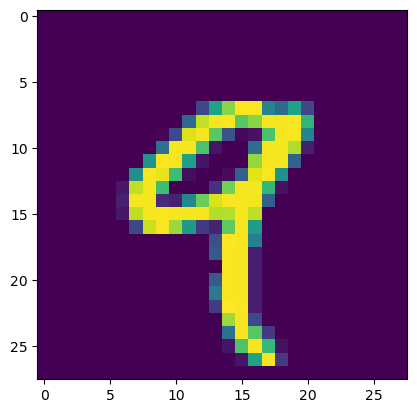

In [6]:
plt.imshow(X_train[4])

In [7]:
X_train = X_train/255
X_test = X_test/255

In [8]:
model = Sequential([
    Flatten(input_shape = (28,28)),
    Dense(64,activation = 'relu'),
    Dense(10,activation = 'softmax')
#     Dense(4,activation = 'sigmoid')

])


In [9]:
model.compile(optimizer = 'adam', loss='sparse_categorical_crossentropy', metrics = ['accuracy'])

In [10]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 784)               0         
                                                                 
 dense (Dense)               (None, 64)                50240     
                                                                 
 dense_1 (Dense)             (None, 10)                650       
                                                                 
Total params: 50,890
Trainable params: 50,890
Non-trainable params: 0
_________________________________________________________________


In [11]:
hist = model.fit(X_train,y_train, validation_split = 0.2, epochs = 10)

Epoch 1/10
1500/1500 [==============================] - 3s 1ms/step - loss: 0.3359 - accuracy: 0.9070 - val_loss: 0.1880 - val_accuracy: 0.9465
Epoch 2/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1648 - accuracy: 0.9510 - val_loss: 0.1544 - val_accuracy: 0.9556
Epoch 3/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.1221 - accuracy: 0.9640 - val_loss: 0.1386 - val_accuracy: 0.9590
Epoch 4/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0979 - accuracy: 0.9710 - val_loss: 0.1166 - val_accuracy: 0.9643
Epoch 5/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0790 - accuracy: 0.9762 - val_loss: 0.1068 - val_accuracy: 0.9675
Epoch 6/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0659 - accuracy: 0.9805 - val_loss: 0.1012 - val_accuracy: 0.9703
Epoch 7/10
1500/1500 [==============================] - 2s 1ms/step - loss: 0.0558 - accuracy: 0.9831 - val_loss: 0.1026 - val_accuracy:

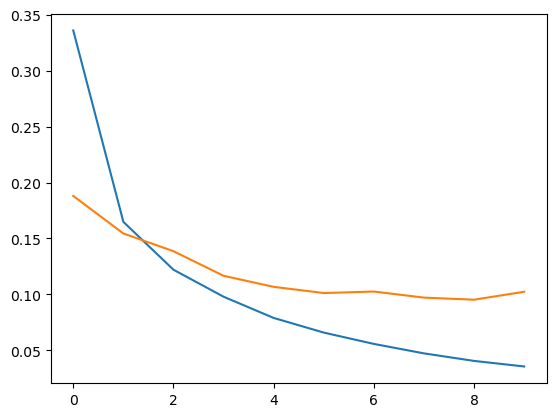

In [12]:
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.show()

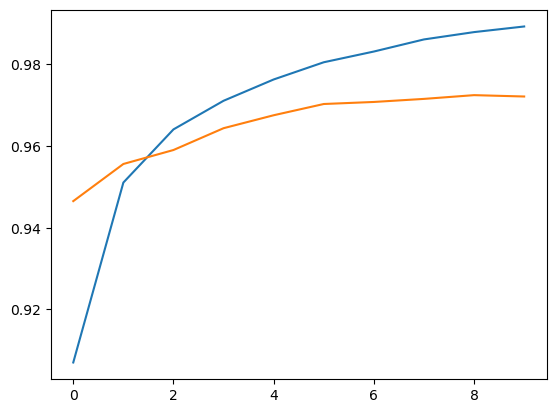

In [13]:
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.show()

In [14]:
y_prob = model.predict(X_test)
y_prob

313/313 [==============================] - 0s 858us/step


array([[9.20467983e-07, 3.81011773e-08, 1.02654190e-06, ...,
        9.99874592e-01, 1.65276051e-05, 5.45259672e-06],
       [1.68570335e-09, 1.15072864e-04, 9.99873400e-01, ...,
        9.84803276e-13, 1.11834333e-05, 2.88564237e-14],
       [2.20676957e-05, 9.99402881e-01, 1.07983535e-04, ...,
        2.66389747e-04, 1.82845513e-04, 1.21068112e-07],
       ...,
       [1.76417339e-13, 4.43679002e-13, 6.78784199e-12, ...,
        5.69938447e-06, 2.04447701e-06, 2.56329622e-05],
       [5.26205080e-10, 8.99431363e-10, 7.45383464e-13, ...,
        2.00765077e-12, 8.00586804e-06, 1.05288131e-11],
       [1.06623120e-12, 2.31892312e-14, 1.17868354e-11, ...,
        3.05746571e-14, 1.55014526e-11, 1.14092627e-13]], dtype=float32)

In [15]:
y_pred = y_prob.argmax(axis = 1)
y_test

array([7, 2, 1, ..., 4, 5, 6], dtype=uint8)

In [16]:
confusion_matrix(y_pred,y_test)

array([[ 959,    0,    1,    2,    2,    1,    4,    1,    5,    1],
       [   0, 1121,    1,    1,    0,    1,    2,    5,    2,    6],
       [   3,    4, 1004,    6,    2,    0,    1,    9,    4,    0],
       [   1,    0,    1,  968,    1,    5,    1,    1,    3,    2],
       [   0,    0,    3,    0,  950,    0,    1,    0,    2,   10],
       [   0,    1,    0,   18,    1,  869,    2,    1,    4,    5],
       [  12,    4,    7,    0,    6,    9,  946,    0,    6,    1],
       [   2,    0,    5,    6,    3,    0,    0, 1003,    3,    6],
       [   2,    5,    9,    8,    3,    6,    1,    2,  943,    8],
       [   1,    0,    1,    1,   14,    1,    0,    6,    2,  970]])

In [17]:
accuracy_score(y_pred,y_test)

0.9733